In [1]:
from model import UNET
from util import *
import tensorflow as tf
import numpy as np


import os
import tarfile

In [2]:
dataPath = os.path.join(".","Data","peixi","Images")
classfilePath = os.path.join(".","Data","multi_class.txt")
dataType = "*.png"

SEED = 42
DATA_SPLIT = 1

OPTIMIZER = "adam"
LOSS = "binary_crossentropy" #assuming things can be of the same category, 
METRICS = ["accuracy"]
BATCH_SIZE = 16
IMAGE_SHAPE = (512,512,1)
KFOLD  = 2 #MUST BE >=2
RPT_COUNT = 10
EPOCHS = 500

In [3]:
# LOAD DATASET AS TF DATASET
dataset,class_dict = generate_dataset(dataPath, dataType, seed=SEED, img_shape = IMAGE_SHAPE, batch_size = BATCH_SIZE,
                           enable_augmentation=(1,1,0,1,0,0),
                          kfold = KFOLD, repeat_count = RPT_COUNT,class_file = classfilePath)
NUM_CLASSES = len(class_dict)


{'Tooth': 0, 'Bone': 1, 'Major_nerve': 2, 'Restoration': 3, 'Root_canal': 4, 'Sinus': 5}
image augmentation
Metal device set to: Apple M1 Pro


2022-04-13 20:37:05.908268: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-13 20:37:05.908383: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
model = UNET(input_shape = IMAGE_SHAPE, num_classes = NUM_CLASSES)
model.compile(optimizer = OPTIMIZER, loss = LOSS, metrics = METRICS)
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit(dataset[0],validation_data = dataset[1], epochs = EPOCHS, verbose = 1, callbacks=callbacks_list)
history = history.history

softmax
Epoch 1/500


2022-04-13 20:54:09.264648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - ETA: 0s - loss: 0.4521 - accuracy: 0.3678

2022-04-13 20:54:41.899705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 45s 5s/step - loss: 0.4521 - accuracy: 0.3678 - val_loss: 328.8802 - val_accuracy: 0.3827

Epoch 00001: val_accuracy improved from -inf to 0.38270, saving model to weights-improvement-01-0.38.hdf5
Epoch 2/500
9/9 [==============================] - 45s 5s/step - loss: 0.3207 - accuracy: 0.4950 - val_loss: 43.6533 - val_accuracy: 0.3736

Epoch 00002: val_accuracy did not improve from 0.38270
Epoch 3/500
9/9 [==============================] - 45s 5s/step - loss: 0.2628 - accuracy: 0.6232 - val_loss: 4.0846 - val_accuracy: 0.2930

Epoch 00003: val_accuracy did not improve from 0.38270
Epoch 4/500
9/9 [==============================] - 44s 5s/step - loss: 0.2323 - accuracy: 0.6216 - val_loss: 3.3692 - val_accuracy: 0.1344

Epoch 00004: val_accuracy did not improve from 0.38270
Epoch 5/500
9/9 [==============================] - 44s 5s/step - loss: 0.2204 - accuracy: 0.6361 - val_loss: 1.4354 - val_accuracy: 0.2596

Epoch 00005: val_accuracy did not impr

In [37]:
model.save_weights("multiclass_weights/multiclass")

# Lets view results after training

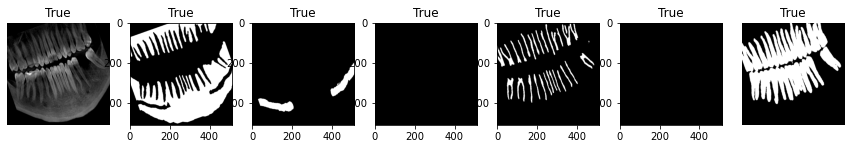

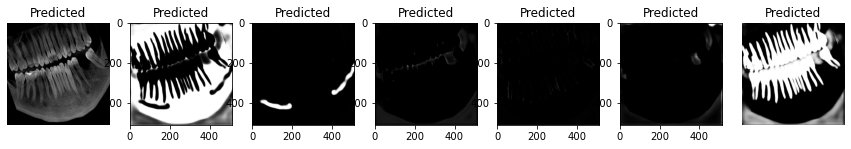

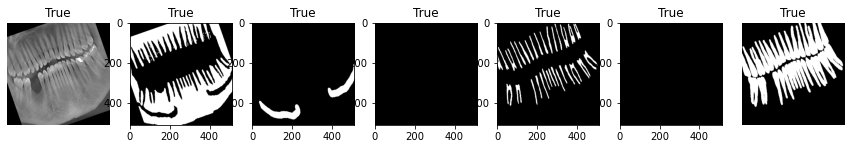

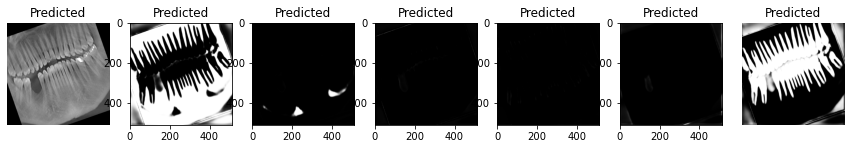

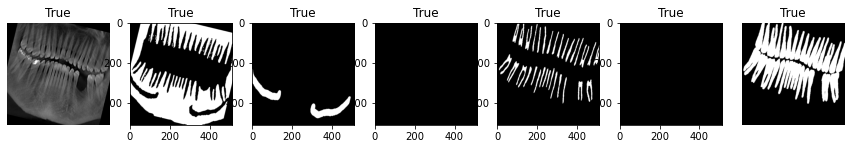

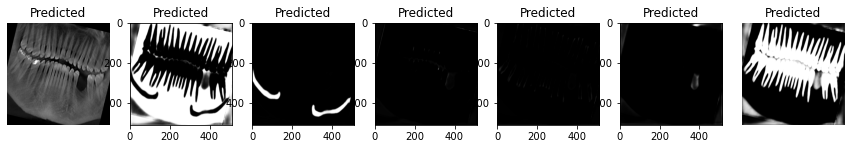

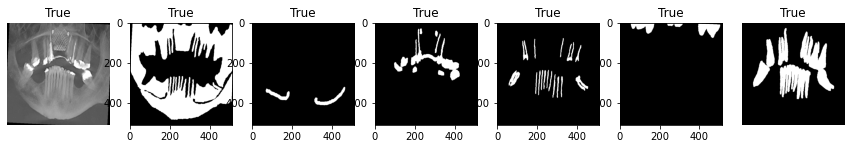

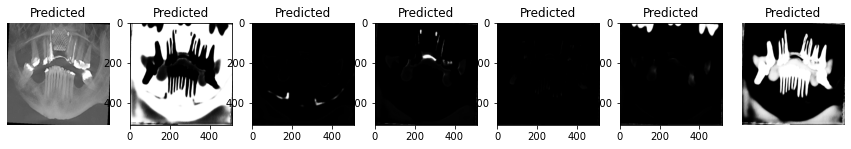

In [35]:
#TRAINING
for element in dataset[0].take(1): #take a batch
    predictions = model.predict(element[0])
    for b in range(min(4,BATCH_SIZE)): #now have a tuple
        display_mask_image([element[0][b],element[1][b]],mytitle="True")
        display_mask_image([element[0][b],predictions[b]],mytitle="Predicted")

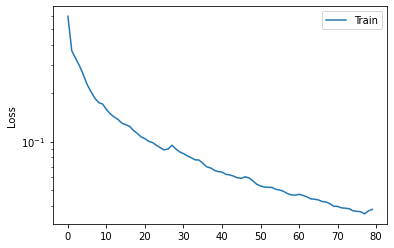

In [33]:
plt.semilogy(history["loss"],label="Train")
#plt.semilogy(history["val_loss"],label="Kfold")
plt.ylabel("Loss")
plt.legend()

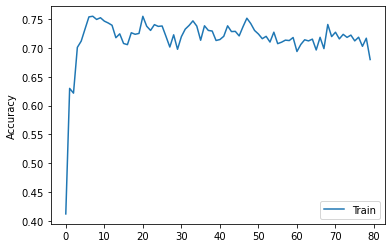

In [34]:
plt.plot(history["accuracy"],label="Train")
#plt.plot(history["val_accuracy"],label="Kfold")
plt.ylabel("Accuracy")
plt.legend()